<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB01/LAB01_Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vacunaciones COVID
`` PRÁCTICA 1``

# Descarga del dataset
Descarga de vacunaciones.csv y Countries by Continent.csv guardados en el mismo repositorio de Github.

In [256]:
import requests
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/vacunaciones.csv"
nombre = 'vacunaciones.csv'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")



Archivo descargado exitosamente.


Cargamos el archivo de vacunaciones CSV en un DataFrame de pandas que llamamos `ds`.


In [257]:
ds = pd.read_csv('vacunaciones.csv')
# Mostramos las 3 primeras entradas del dataset
ds.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.0,0.0,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


# Exploración de la base de datos

Veamos las variables de la base de datos y de qué tipo es cada una.

In [258]:
print(ds.dtypes)

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object


Lo primero que haremos será convertir la variable `date` de tipo `object` a tipo fecha o `datetime`.

In [259]:
# Convertir la columna de fecha a formato datetime
ds['date'] = pd.to_datetime(ds['date'])
print(ds['date'].dtypes)

datetime64[ns]


A continuación veremos sobre que países se hace el estudio:

In [260]:
paises = ds['country'].unique()
print(paises)

['Albania' 'Algeria' 'Andorra' 'Anguilla' 'Argentina' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belgium' 'Bermuda' 'Bolivia'
 'Brazil' 'Bulgaria' 'Cambodia' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Egypt'
 'England' 'Estonia' 'Faeroe Islands' 'Finland' 'France' 'Germany'
 'Gibraltar' 'Greece' 'Greenland' 'Guernsey' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jersey'
 'Kuwait' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Maldives'
 'Malta' 'Mauritius' 'Mexico' 'Monaco' 'Morocco' 'Myanmar' 'Nepal'
 'Netherlands' 'Northern Cyprus' 'Northern Ireland' 'Norway' 'Oman'
 'Pakistan' 'Panama' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia'
 'Saint Helena' 'Saudi Arabia' 'Scotland' 'Serbia' 'Seychelles'
 'Singapore' 'Slovakia' 'Slovenia' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Turkey' 'Turks and Caicos Islands' 'United Arab Emirates'
 'United Kingdom' 'United State

**Estudio de NaNs**

Calculamos la suma de valores NaN

In [265]:
ds.isna().sum()

country                                   0
iso_code                                256
date                                      0
total_vaccinations                     1124
people_vaccinated                      1481
people_fully_vaccinated                2114
daily_vaccinations_raw                 1473
daily_vaccinations                      125
total_vaccinations_per_hundred         1124
people_vaccinated_per_hundred          1481
people_fully_vaccinated_per_hundred    2114
daily_vaccinations_per_million          125
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Concretamente, nos interesa los de la variable `people_vaccinated` que vamos a analizar y eliminar sus valores NaN.

In [268]:
conteo_nans = ds['people_vaccinated'].isna().sum
conteo_nans

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1        True
2       False
3       False
4       False
        ...  
3203    False
3204    False
3205    False
3206    False
3207    False
Name: people_vaccinated, Length: 3208, dtype: bool>

In [269]:
conteo_nans = ds['people_vaccinated'].isna().sum()
conteo_no_nans = len(ds) - conteo_nans

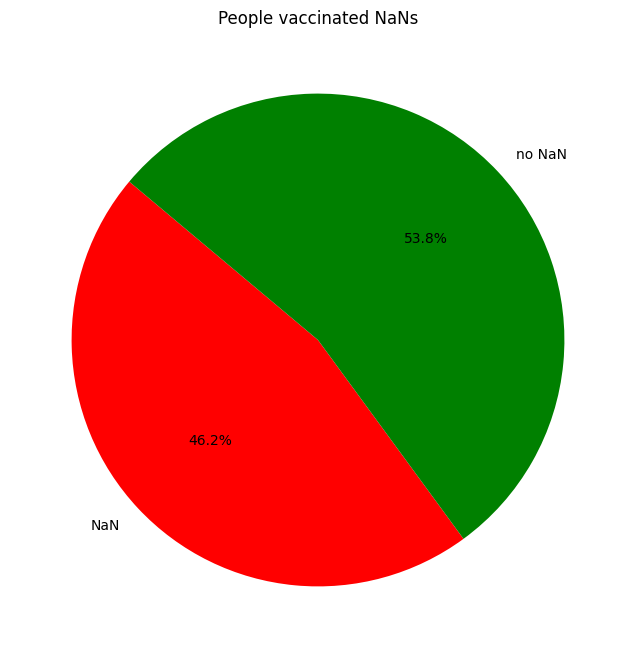

In [270]:
import matplotlib.pyplot as plt

# Datos de ejemplo
sizes = [conteo_nans, conteo_no_nans]
labels = ['NaN','no NaN']
colors = ['red', 'green']  # Rojo para el primer valor, verde para el segundo
# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors, startangle=140)

# Añadir título
plt.title('People vaccinated NaNs')

# Mostrar el gráfico
plt.show()

Y ahora ordenamos por país y fecha para mayor claridad en la lectura de los datos.

In [271]:
# Ordenar las filas por país y fecha
ds = ds.sort_values(by=['country', 'date'])

# 1.
Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello
cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.

Como las filas ya están ordenadas por país y fecha, simplemente hay que tomar la media de las 3 entradas anteriores a un NaN

In [272]:
# creo una copia de ds para modificarla sin afectar al original
df = ds.copy()
id(df), id(ds)

(134110044073664, 134110044075440)

Iterando por `ds` cada vez que aparezca un NaN, se establecerá un `start_index` que avanzará en posiciones anteriores, idealmente tomando la media de las 3 entries anteriores. Pero si alguna entry anterior pertenece a un país distinto, no se tendrá en cuenta.

In [301]:
# Iterar sobre los NaN y calcular la media de los tres valores anteriores
for i, row in df.iterrows():
    if pd.isna(row['people_vaccinated']):
        # Para las entries que van de 0 a 2 (quedaria negativo al restar 3)
        start_index = i
        # Para que la primera entry de un pais no utilice datos del pais anterior
        for j in range(3):
          if i>1 and row['country'] == df.at[start_index-j, 'country']:
            start_index = start_index-1  # Índice de inicio para calcular la media

        end_index = i  # Índice final para calcular la media
        mean_value = df.iloc[start_index:end_index]['people_vaccinated'].mean()
        df.at[i, 'people_vaccinated'] = mean_value

In [302]:
cantidad_nan = df['people_vaccinated'].isna().sum()  # Reemplaza 'nombre_de_columna' con el nombre de la columna que deseas verificar

In [303]:
cantidad_nan

1

Tomamos un ejemplo para ver si el código se ha ejecutado de manera deseada.

Con el dataset original `ds`.
- La primera entrada (índice 880) para `people_vaccinated` es 55389.0, y a este valor le suceden NaNs que deberían tomar el valor anterior sucesivamente (ya que no se puede hacer la media con un solo dato).
- La octava entrada (índice 887) para `people_vaccinated` es 573858.0 y a este valor le suceden NaNs que deberían tomar el valor de la media entre los 3 valores anteriores que serían: 55389.0, 55389.0 y 573858.0

In [304]:
England = ds[ds['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
880,England,NaN,2020-12-13,55389.0,55389.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
881,England,NaN,2020-12-14,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
882,England,NaN,2020-12-15,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
883,England,NaN,2020-12-16,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
884,England,NaN,2020-12-17,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
885,England,NaN,2020-12-18,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
886,England,NaN,2020-12-19,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
887,England,NaN,2020-12-20,573858.0,573858.0,NaN,NaN,74067.0,1.02,1.02,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
888,England,NaN,2020-12-21,NaN,NaN,NaN,NaN,68942.0,NaN,NaN,NaN,1225.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
889,England,NaN,2020-12-22,NaN,NaN,NaN,NaN,63817.0,NaN,NaN,NaN,1134.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Haciendo la media manualmente:

In [309]:
media = (England.at[880,'people_vaccinated'] + England.at[880,'people_vaccinated'] + England.at[887,'people_vaccinated']) / 3 # valor esperado para el indice 888
print(media)

228212.0


Ahora mostramos `df` que es el dataset modificado sin NaNs, y verificamos que sus valores coinciden con los esperados.

In [307]:
England2= df[df['country'] == 'England']
England2.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
880,England,NaN,2020-12-13,55389.0,55389.000000,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
881,England,NaN,2020-12-14,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
882,England,NaN,2020-12-15,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
883,England,NaN,2020-12-16,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
884,England,NaN,2020-12-17,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
885,England,NaN,2020-12-18,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
886,England,NaN,2020-12-19,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
887,England,NaN,2020-12-20,573858.0,573858.000000,NaN,NaN,74067.0,1.02,1.02,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
888,England,NaN,2020-12-21,NaN,228212.000000,NaN,NaN,68942.0,NaN,NaN,NaN,1225.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
889,England,NaN,2020-12-22,NaN,285819.666667,NaN,NaN,63817.0,NaN,NaN,NaN,1134.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [310]:
media == England2.at[888, 'people_vaccinated']


True

Comprobamos que se hayan modificado los valores NaN correctamente

In [ ]:
if df['people_vaccinated'].isna().any():
    print("Hay valores NaN en la columna.")
else:
    print("No hay valores NaN en la columna.")

Hay valores NaN en la columna.


# 2.
De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.


In [311]:
# Agrupar por país y contar las entradas para cada uno
conteo = df.groupby('country').size()
# Ordenar de mayor a menor
conteo = conteo.sort_values(ascending=False)

Vemos los países con más entries, ya que cada entry es un día de vacunación en un país.

In [312]:
print(conteo[:5])

country
Wales               64
England             64
Scotland            64
Northern Ireland    64
United Kingdom      64
dtype: int64


Nos damos cuenta de que `United Kingdom` está compuesto por los países `Wales`, `England`, `Scotland`, `Northern Ireland`. Vamos a ver si los datos coinciden. Ya que en caso afirmativo, sería una variable dependiente (la suma de los países que lo componen) y no aporta información nueva.

In [313]:
 wales = df[df['country'] == 'Wales']

In [ ]:
# con people vaccinated de los 4 paises si su suma da UK
suma = 0
for pais in top_5.index:
  suma = df[df['country'] == pais]['people_vaccinated'].sum() + suma

In [ ]:
suma

620177187.9093878

In [ ]:
suma2 = df[df['country'] == 'United Kingdom']['people_vaccinated'].sum()
suma2

310113136.23247176

In [ ]:
df[df['country'] == top_5[:4]]

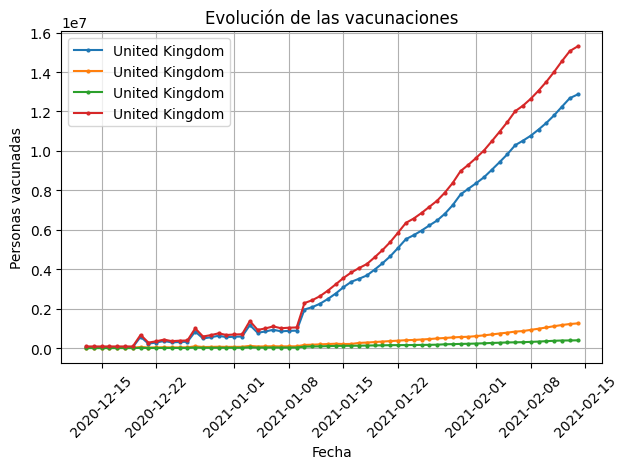

In [ ]:
import matplotlib.pyplot as plt
for pais in top_5[1:5].index:
  top5 = df[df['country'] == pais]

  # Crear el gráfico de líneas
  plt.plot(top5['date'], top5['people_vaccinated'], marker='o', linestyle='-', markersize=2)
  plt.legend(top5['country'])
# Configurar el título y etiquetas de los ejes
plt.title('Evolución de las vacunaciones')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
# Leyenda

plt.show()

In [ ]:
England = ds[ds['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Continent


In [ ]:
England = df[df['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Continent
